In [17]:
import numpy as np
import random as rm
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
# from sklearn.linear_model import Perceptron, LinearRegression, Ridge
# from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [26]:
def getData(fname1, fname2):
    df_train = pd.read_csv(fname1)
    df_test = pd.read_csv(fname2)
    data_train = np.array(df_train)
    data_test = np.array(df_test)
    xdata_train = data_train[:,:len(data_train[0]) - 1]
    ydata_train = data_train[:, -1]
    xdata_test = data_test[:,:len(data_test[0]) - 1]
    ydata_test = data_test[:, -1]
    
    return xdata_train, ydata_train, xdata_test, ydata_test
    
xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select = getData("mushroom_train_select.csv", "mushroom_test_select.csv")

print(f"The shape of training xdata shape is", xdata_train_select.shape)
print(f"The shape of training ydata shape is", ydata_train_select.shape)
print(f"The shape of testing xdata shape is", xdata_test_select.shape)
print(f"The shape of testing ydata shape is", ydata_test_select.shape)

The shape of training xdata shape is (42748, 32)
The shape of training ydata shape is (42748,)
The shape of testing xdata shape is (18321, 32)
The shape of testing ydata shape is (18321,)


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def KNN_experiment_PCA(xdata_train_select, ydata_train_select, k, components):
    
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)

    f1_score_train_history = []
    f1_score_val_history = []
    acc_train_history = []
    acc_val_history = []

    pca = PCA(n_components = components)
    xdata_train = pca.fit_transform(xdata_train)
    
    nums_epoch = 10
    for epoch in range(nums_epoch):
        f1_scores_train = []
        f1_scores_val = []
        acc_train_epoch = []
        acc_val_epoch = []
        
        # use cross-validation with 4 folds
        cv = KFold(n_splits=4,shuffle=True)
        for i, (train_index, val_index) in enumerate(cv.split(xdata_train)): # i in range of 4

            D_train_xdata = xdata_train[train_index]
            D_train_ydata = ydata_train[train_index]
            D_val_xdata = xdata_train[val_index]
            D_val_ydata = ydata_train[val_index]
            
            # create a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(D_train_xdata, D_train_ydata)

            # predict validation labels using KNN
            ydata_train_pred = knn.predict(D_train_xdata)
            ydata_val_pred = knn.predict(D_val_xdata)

            # calculate validation f1_score and record for each fold
            f1_train = f1_score(D_train_ydata, ydata_train_pred)
            f1_val = f1_score(D_val_ydata, ydata_val_pred)
            f1_scores_train.append(f1_train)
            f1_scores_val.append(f1_val)

            # calculate accuracy and record for each fold
            acc_train = np.sum(D_train_ydata==ydata_train_pred) / len(D_train_ydata)
            acc_val = np.sum(D_val_ydata==ydata_val_pred) / len(D_val_ydata)
            acc_train_epoch.append(acc_train)
            acc_val_epoch.append(acc_val)

    
        f1_score_train_history.append(np.mean(f1_scores_train))
        f1_score_val_history.append(np.mean(f1_scores_val))
        acc_train_history.append(np.mean(acc_train_epoch))
        acc_val_history.append(np.mean(acc_val_epoch))
        
    print(f"The mean of training F1 Score = {np.mean(f1_score_val_history)}, std = {np.std(f1_score_val_history)}")
    print(f"The mean of training accuracy = {np.mean(acc_train_history)}, std = {np.std(acc_train_history)}")
    print(f"The mean of validation F1 Score = {np.mean(f1_score_val_history)}, std = {np.std(f1_score_val_history)}")
    print(f"The mean of validation accuracy = {np.mean(acc_val_history)}, std = {np.std(acc_val_history)}")
    
    # Plot the learning curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Learning curve when k = {k}")
    ax1.plot(np.arange(len(f1_score_train_history)), f1_score_train_history, label = "Training F1 Score")
    ax1.plot(np.arange(len(f1_score_val_history)), f1_score_val_history, label = "Validation F1 Score")
    ax1.legend()

    ax2.plot(np.arange(len(acc_train_history)), acc_train_history, label = "Training Accuracy")
    ax2.plot(np.arange(len(acc_val_history)), acc_val_history, label = "Validation Accuracy")
    ax2.legend()

The mean of training F1 Score = 0.9996989055496751, std = 6.081453158572446e-05
The mean of training accuracy = 1.0, std = 0.0
The mean of validation F1 Score = 0.9996989055496751, std = 6.081453158572446e-05
The mean of validation accuracy = 0.9996678207167585, std = 6.682350920317539e-05


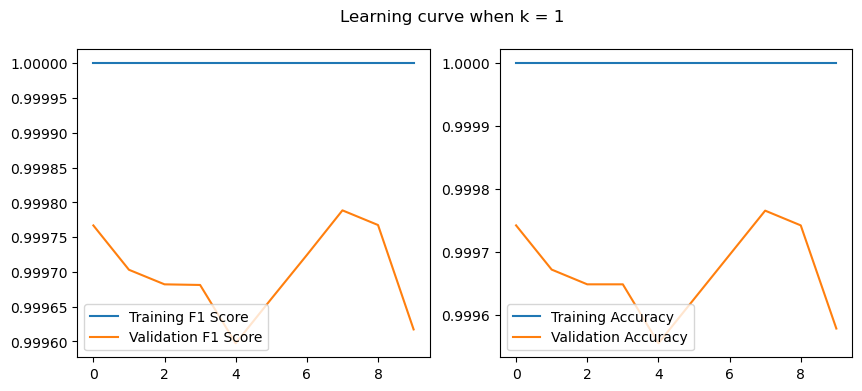

In [4]:
KNN_experiment_PCA(xdata_train_select, ydata_train_select, 1, 30)

The mean of training F1 Score = 0.9982959674819609, std = 0.0001592041730821321
The mean of training accuracy = 0.9986338542154017, std = 5.146439599515423e-05
The mean of validation F1 Score = 0.9982959674819609, std = 0.0001592041730821321
The mean of validation accuracy = 0.9981192102554507, std = 0.0001760539695165058


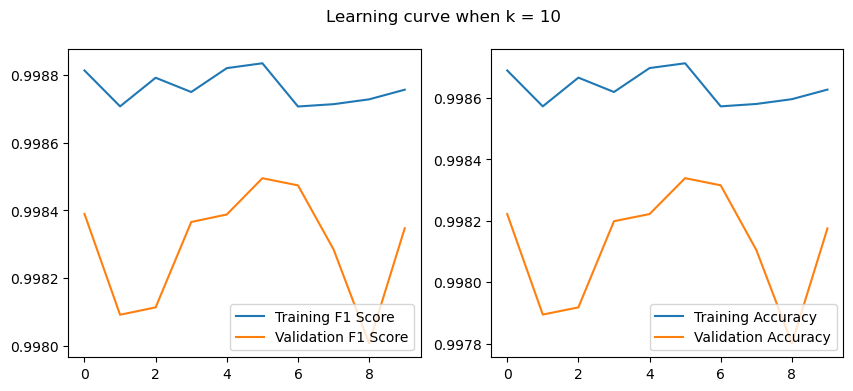

In [5]:
KNN_experiment_PCA(xdata_train_select, ydata_train_select, 10, 30)

The mean of training F1 Score = 0.9549543294182646, std = 0.0007882684482933164
The mean of training accuracy = 0.9512507407753971, std = 0.000662934796027274
The mean of validation F1 Score = 0.9549543294182646, std = 0.0007882684482933164
The mean of validation accuracy = 0.9493871058295126, std = 0.00091532951793459


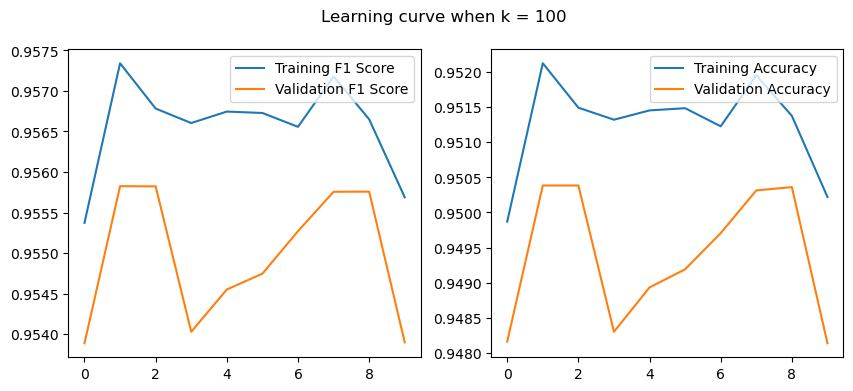

In [7]:
KNN_experiment_PCA(xdata_train_select, ydata_train_select, 100, 15)

The mean of training F1 Score = 0.8157477354679628, std = 0.0008846526917039745
The mean of training accuracy = 0.7953978353763139, std = 0.0008143808376661318
The mean of validation F1 Score = 0.8157477354679628, std = 0.0008846526917039745
The mean of validation accuracy = 0.7945775240946945, std = 0.0009548891909279568


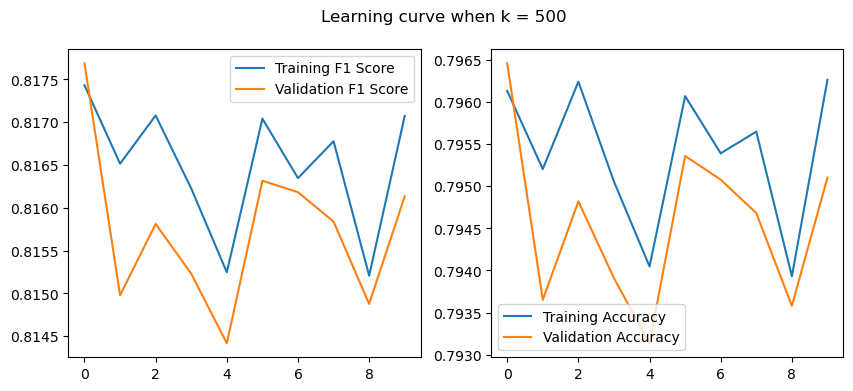

In [13]:
KNN_experiment_PCA(xdata_train_select, ydata_train_select, 500, 15)

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def KNN_experiment_LDA(xdata_train_select, ydata_train_select, k, components):
    
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)

    f1_score_train_history = []
    f1_score_val_history = []
    acc_train_history = []
    acc_val_history = []

    lda = LinearDiscriminantAnalysis(n_components=components)
    xdata_train = lda.fit_transform(xdata_train, ydata_train)
    
    nums_epoch = 10
    for epoch in range(nums_epoch):
        f1_scores_train = []
        f1_scores_val = []
        acc_train_epoch = []
        acc_val_epoch = []
        
        # use cross-validation with 4 folds
        cv = KFold(n_splits=4,shuffle=True)
        for i, (train_index, val_index) in enumerate(cv.split(xdata_train)): # i in range of 4

            D_train_xdata = xdata_train[train_index]
            D_train_ydata = ydata_train[train_index]
            D_val_xdata = xdata_train[val_index]
            D_val_ydata = ydata_train[val_index]
            
            # create a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(D_train_xdata, D_train_ydata)

            # predict validation labels using KNN
            ydata_train_pred = knn.predict(D_train_xdata)
            ydata_val_pred = knn.predict(D_val_xdata)

            # calculate validation f1_score and record for each fold
            f1_train = f1_score(D_train_ydata, ydata_train_pred)
            f1_val = f1_score(D_val_ydata, ydata_val_pred)
            f1_scores_train.append(f1_train)
            f1_scores_val.append(f1_val)

            # calculate accuracy and record for each fold
            acc_train = np.sum(D_train_ydata==ydata_train_pred) / len(D_train_ydata)
            acc_val = np.sum(D_val_ydata==ydata_val_pred) / len(D_val_ydata)
            acc_train_epoch.append(acc_train)
            acc_val_epoch.append(acc_val)

    
        f1_score_train_history.append(np.mean(f1_scores_train))
        f1_score_val_history.append(np.mean(f1_scores_val))
        acc_train_history.append(np.mean(acc_train_epoch))
        acc_val_history.append(np.mean(acc_val_epoch))
        
    print(f"The mean of training F1 Score = {np.mean(f1_score_val_history)}, std = {np.std(f1_score_val_history)}")
    print(f"The mean of training accuracy = {np.mean(acc_train_history)}, std = {np.std(acc_train_history)}")
    print(f"The mean of validation F1 Score = {np.mean(f1_score_val_history)}, std = {np.std(f1_score_val_history)}")
    print(f"The mean of validation accuracy = {np.mean(acc_val_history)}, std = {np.std(acc_val_history)}")
    
    # Plot the learning curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Learning curve when k = {k}")
    ax1.plot(np.arange(len(f1_score_train_history)), f1_score_train_history, label = "Training F1 Score")
    ax1.plot(np.arange(len(f1_score_val_history)), f1_score_val_history, label = "Validation F1 Score")
    ax1.legend()

    ax2.plot(np.arange(len(acc_train_history)), acc_train_history, label = "Training Accuracy")
    ax2.plot(np.arange(len(acc_val_history)), acc_val_history, label = "Validation Accuracy")
    ax2.legend()

The mean of training F1 Score = 0.6751173786252431, std = 0.0010832110253885562
The mean of training accuracy = 1.0, std = 0.0
The mean of validation F1 Score = 0.6751173786252431, std = 0.0010832110253885562
The mean of validation accuracy = 0.6415902498362496, std = 0.0011460161157862577


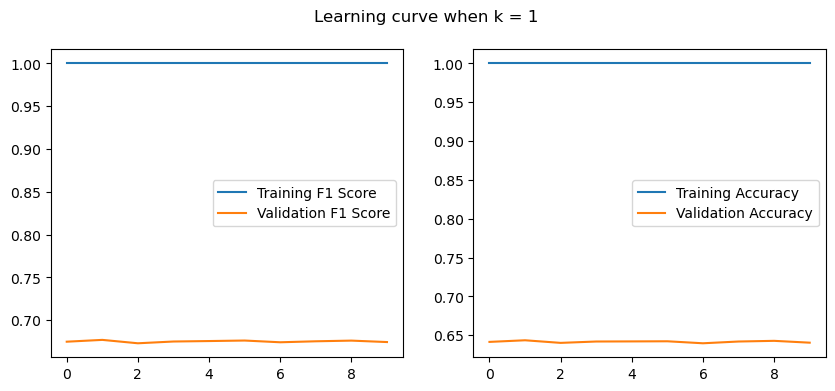

In [30]:
KNN_experiment_LDA(xdata_train_select, ydata_train_select, 1, 1)

The mean of training F1 Score = 0.7199241383437412, std = 0.0010905799838560892
The mean of training accuracy = 0.7534130251707681, std = 0.00023273167028294925
The mean of validation F1 Score = 0.7199241383437412, std = 0.0010905799838560892
The mean of validation accuracy = 0.7058762983063536, std = 0.0009323651040886391


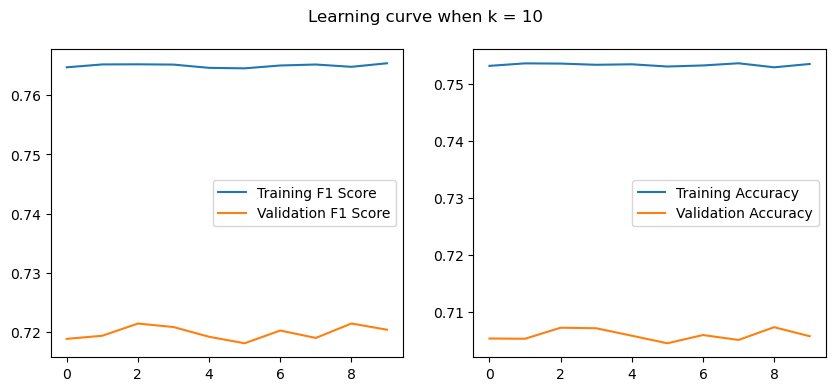

In [31]:
KNN_experiment_LDA(xdata_train_select, ydata_train_select, 10, 1)

The mean of training F1 Score = 0.7462341856364791, std = 0.0006969860923836956
The mean of training accuracy = 0.7313153051994636, std = 0.00028916089495242017
The mean of validation F1 Score = 0.7462341856364791, std = 0.0006969860923836956
The mean of validation accuracy = 0.726901843361093, std = 0.0007078587056464987


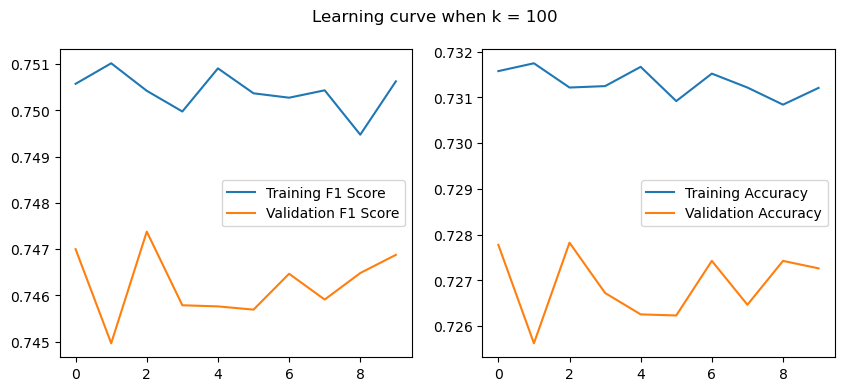

In [33]:
KNN_experiment_LDA(xdata_train_select, ydata_train_select, 100, 1)

The mean of training F1 Score = 0.7456977772213532, std = 0.00042078165332564793
The mean of training accuracy = 0.7286375970805652, std = 0.00017041714661095235
The mean of validation F1 Score = 0.7456977772213532, std = 0.00042078165332564793
The mean of validation accuracy = 0.727858613268457, std = 0.00036887432777640524


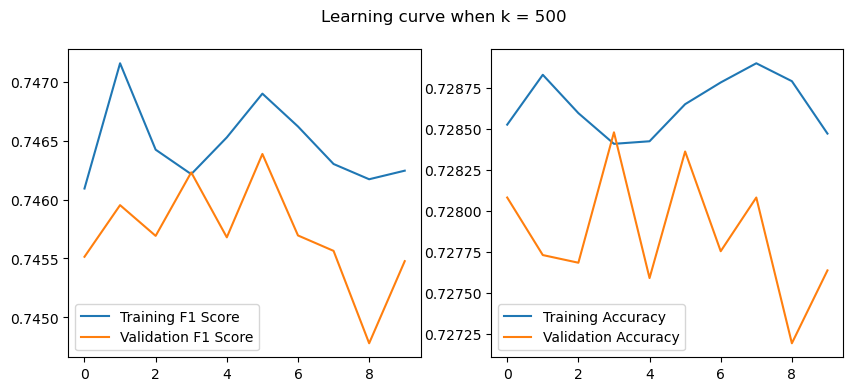

In [34]:
KNN_experiment_LDA(xdata_train_select, ydata_train_select, 500, 1)

The mean of training F1 Score = 0.744675413096523, std = 0.00018921100767441116
The mean of training accuracy = 0.727513178004429, std = 8.702664563366052e-05
The mean of validation F1 Score = 0.744675413096523, std = 0.00018921100767441116
The mean of validation accuracy = 0.7272667727145129, std = 0.00018472992441658496


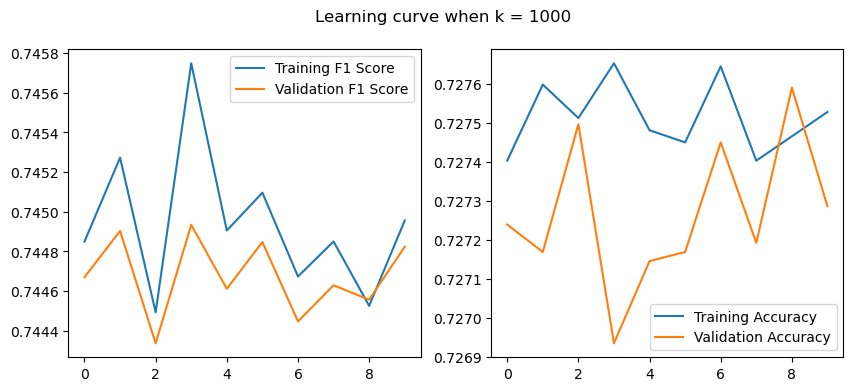

In [35]:
KNN_experiment_LDA(xdata_train_select, ydata_train_select, 1000, 1)

## Test

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def test_KNN_experiment_PCA(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select, k, components):
    
    xdata_train = np.copy(xdata_train_select)
    ydata_train = np.copy(ydata_train_select)
    xdata_test = np.copy(xdata_test_select)
    ydata_test = np.copy(ydata_test_select)
    
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    xdata_test = scaler.transform(xdata_test)

    f1_score_train_history = []
    f1_score_val_history = []
    acc_train_history = []
    acc_val_history = []

    pca = PCA(n_components = components)
    xdata_train = pca.fit_transform(xdata_train)
    xdata_test = pca.transform(xdata_test)
        
    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xdata_train, ydata_train)

    # Predict test labels using KNN
    ydata_train_pred = knn.predict(xdata_train)
    ydata_test_pred = knn.predict(xdata_test)

    # Calculate F1 Score
    f1_train = f1_score(ydata_train, ydata_train_pred)
    f1_test = f1_score(ydata_test, ydata_test_pred)

    # Calculate accurcay
    acc_train = np.sum(ydata_train==ydata_train_pred) / len(ydata_train)
    acc_test = np.sum(ydata_test==ydata_test_pred) / len(ydata_test)
        
    print(f"The training F1 Score = {f1_train}")        
    print(f"The testing F1 Score = {f1_test}")        
    print(f"The training accuracy = {acc_train}")
    print(f"The testing accuracy = {acc_test}")
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(ydata_test, ydata_test_pred)
    plt.figure(figsize = (6, 6))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title("Confusion Matrix for KNN System")

The training F1 Score = 0.9990248865900708
The testing F1 Score = 0.9986386619992221
The training accuracy = 0.9989239262655563
The testing accuracy = 0.9984716991430599


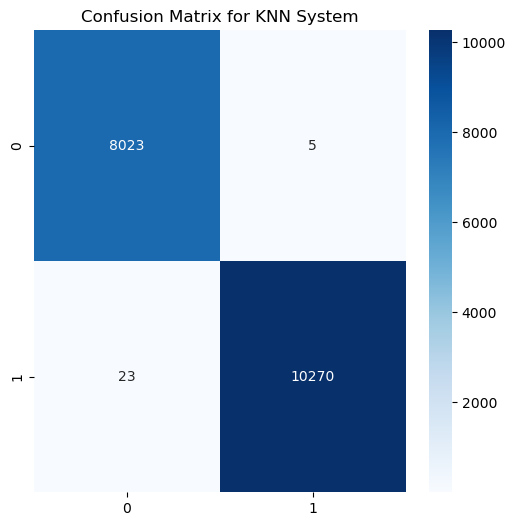

In [42]:
test_KNN_experiment_PCA(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select,  10, 30)